In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
gender_data=pd.read_csv('gender_submission.csv')
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

### Train Data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Dictionary 
-----------------------

Variable    |  Definition                                | Key
----------- | ------------------------------------------ | -------------
survival    |  Survival                                  | 	0 = No, 1 = Yes
pclass      |  Ticket Class                              | 	1 = 1st, 2 = 2nd, 3 = 3rd
sex         |  Sex                                       |
Age         |  Age of years                              |
sibsp       | # of siblings / spouses aboard the Titanic |
parch       | # of parents / children aboard the Titanic |
ticket      | 	Ticket number                            |
fare        | 	Passenger fare                           |
cabin       | 	Cabin number                             |
embarked    | 	Port of Embarkation                      | 	C = Cherbourg, Q = Queenstown, S = Southampton

### Count Survived based on Sex

In [6]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Survived count between male and female

<AxesSubplot:xlabel='Survived', ylabel='count'>

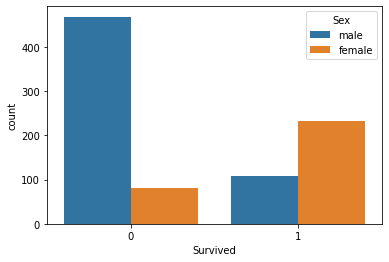

In [7]:
sns.countplot(x='Survived', hue = 'Sex',data=train_data)

### Count Survived based on Pclass

In [8]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Survived', ylabel='count'>

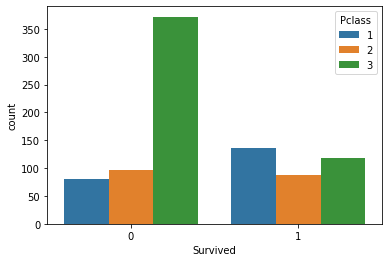

In [9]:
sns.countplot(x='Survived', hue = 'Pclass',data=train_data)

### Count Survived based on Age

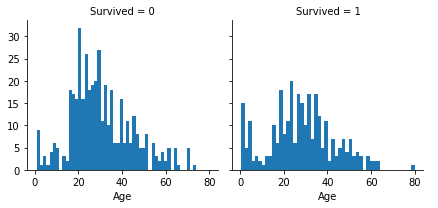

In [10]:
age_data= sns.FacetGrid(train_data, col='Survived')
age_data.map(plt.hist, 'Age', bins=50)
age_data.add_legend()

### Count Survived based on Emarked

In [11]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


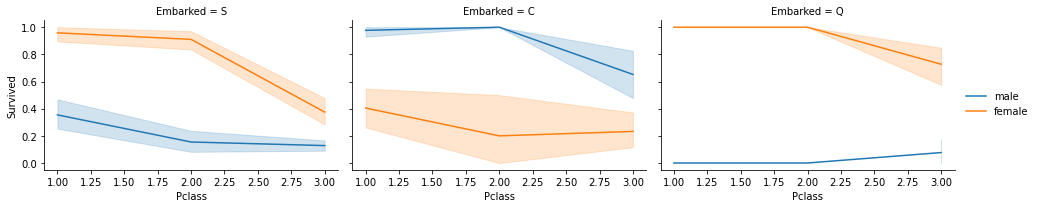

In [12]:
embarked_data = sns.FacetGrid(train_data, col='Embarked', size=3, aspect=1.5)
embarked_data.map(sns.lineplot, 'Pclass', 'Survived', 'Sex')
embarked_data.add_legend()

### Count Survived based on Sibling and Parents

In [13]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [15]:
train_data['Family'] =train_data['Parch']+train_data['SibSp']

In [16]:
train_data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Clean Data

In [18]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

In [19]:
clean_train_data=train_data.fillna(0)

In [20]:
clean_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Family         0
dtype: int64

Let's Combine Family, Sibling, Parch data

New data (alone): check whether the person have family.

In [21]:
new_train_data = clean_train_data.drop(['PassengerId','Ticket','Cabin','Name'], axis=1)
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


Replace female to 0, male to 1

In [22]:
new_train_data['Sex'].replace('female',1 ,inplace=True)
new_train_data['Sex'].replace('male',0, inplace=True)

In [23]:
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


Replace S to 0, C to 1, Q to 2

In [24]:
new_train_data['Embarked'].replace('S',0 ,inplace=True)
new_train_data['Embarked'].replace('C',1, inplace=True)
new_train_data['Embarked'].replace('Q',2, inplace=True)

In [25]:
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


### Test Data

Just like train data, do same thing for test. (remove name, cabin, null value)

In [26]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test_data.shape

(418, 11)

In [28]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
clean_test_data = test_data.fillna(0)
#.dropna()

In [30]:
clean_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [31]:
new_test_data = clean_test_data.drop(['Ticket','Cabin','Name'], axis=1)

In [32]:
new_test_data['Sex'].replace('female',0 ,inplace=True)
new_test_data['Sex'].replace('male',1, inplace=True)

In [33]:
new_test_data['Embarked'].replace('S',0 ,inplace=True)
new_test_data['Embarked'].replace('C',1, inplace=True)
new_test_data['Embarked'].replace('Q',2, inplace=True)

In [34]:
new_test_data['Family'] =new_test_data['Parch']+new_test_data['SibSp']

In [35]:
new_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


In [36]:
new_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,892,3,1,34.5,0,0,7.8292,2,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,2,0
3,895,3,1,27.0,0,0,8.6625,0,0
4,896,3,0,22.0,1,1,12.2875,0,2


In [37]:
X_train = new_train_data.drop("Survived", axis=1)
Y_train = new_train_data["Survived"]
X_test  = new_test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [38]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,0,0
4,3,0,22.0,1,1,12.2875,0,2


In [39]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0


## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model_lin = LinearRegression()
model_lin.fit(X_train,Y_train)

LinearRegression()

In [42]:
model_lin.intercept_

0.6368326618668617

In [43]:
model_lin.coef_

array([-1.61423914e-01,  5.15484716e-01, -2.54877353e-03, -2.30707835e-02,
        7.89040471e-03,  3.86644968e-04,  2.49233721e-02, -1.51803788e-02])

In [44]:
pred_lin=model_lin.predict(X_test)

In [45]:
lin_score =model_lin.score(X_train,Y_train)

In [46]:
lin_pred_score =round(lin_score*100,2)
lin_pred_score

38.38

## Linear Support Vector Classification

In [47]:
from sklearn.svm import LinearSVC

In [48]:
model_scv = LinearSVC()
model_scv.fit(X_train,Y_train)

LinearSVC()

In [49]:
model_scv.intercept_

array([0.15705136])

In [50]:
model_scv.coef_

array([[-0.30881035,  0.97485239, -0.00112766, -0.08718118,  0.08080456,
        -0.01439622,  0.09573607, -0.00637662]])

In [51]:
pred_scv=model_scv.predict(X_test)
scv_score =model_scv.score(X_train,Y_train)
scv_pred_score =round(scv_score*100,2)
scv_pred_score

71.6

## Logistic Regression

In [52]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [53]:
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)

LogisticRegression()

In [54]:
model_log.intercept_

array([1.07290788])

In [55]:
model_log.coef_

array([[-0.9688684 ,  2.62002382, -0.01595021, -0.16840059,  0.06531039,
         0.00283139,  0.14537845, -0.1030902 ]])

In [56]:
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,Y_train)
log_pred_score =round(log_score*100,2)
log_pred_score

79.12

## Random forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model_rfc = RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [59]:
pred_rfc=model_rfc.predict(X_test)
rfc_score =model_rfc.score(X_train,Y_train)
rfc_pred_score =round(rfc_score*100,2)
rfc_pred_score

80.02

## Ridge regression with built-in cross-validation.

In [60]:
from sklearn.linear_model import RidgeCV

In [61]:
model_ridge = RidgeCV()
model_ridge.fit(X_train,Y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [62]:
pred_ridge=model_ridge.predict(X_test)
ridge_score =model_ridge.score(X_train,Y_train)
ridge_pred_score =round(ridge_score*100,2)
ridge_pred_score

38.38

## Lasso Regression

In [63]:
from sklearn import linear_model

In [64]:
model_lasso=linear_model.Lasso(alpha=0.005)
model_lasso.fit(X_train,Y_train)

Lasso(alpha=0.005)

In [65]:
pred_lasso=model_lasso.predict(X_test)
lasso_score =model_lasso.score(X_train,Y_train)
lasso_pred_score =round(lasso_score*100,2)
lasso_pred_score

38.28

## Bayesian Ridge Regression

In [66]:
from sklearn.linear_model import BayesianRidge

In [67]:
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train,Y_train)

BayesianRidge()

In [68]:
pred_bayesian=model_bayesian.predict(X_test)
bayesian_score =model_bayesian.score(X_train,Y_train)
bayesian_pred_score =round(bayesian_score*100,2)
bayesian_pred_score

38.37

## Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,Y_train)

DecisionTreeClassifier()

In [71]:
pred_decision=model_decision.predict(X_test)
decision_score =model_decision.score(X_train,Y_train)
decision_pred_score =round(decision_score*100,2)
decision_pred_score

98.2

## Gaussian Naive Bayes (GaussianNB)

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
model_gaussian=GaussianNB()
model_gaussian.fit(X_train,Y_train)

GaussianNB()

In [74]:
pred_gaussian=model_gaussian.predict(X_test)
gaussian_score =model_gaussian.score(X_train,Y_train)
gaussian_pred_score =round(gaussian_score*100,2)
gaussian_pred_score

78.79

## C-Support Vector Classification.

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [76]:
model_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model_svc.fit(X_train,Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [77]:
pred_svc=model_svc.predict(X_test)
svc_score =model_svc.score(X_train,Y_train)
svc_pred_score =round(svc_score*100,2)
svc_pred_score

84.18

## Regression based on k-nearest neighbors.

In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [79]:
model_knn_reg = KNeighborsRegressor(n_neighbors=3)
model_knn_reg.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [80]:
pred_knn_reg=model_knn_reg.predict(X_test)
knn_reg_score =model_knn_reg.score(X_train,Y_train)
knn_reg_pred_score =round(knn_reg_score*100,2)
knn_reg_pred_score

54.34

## Classifier implementing the k-nearest neighbors vote.

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model_knn_class = KNeighborsClassifier(n_neighbors=3)
model_knn_class.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
pred_knn_class=model_knn_class.predict(X_test)
knn_class_score =model_knn_class.score(X_train,Y_train)
knn_class_pred_score =round(knn_class_score*100,2)
knn_class_pred_score

84.18

In [84]:
model_data={
    'Model':['Linear Regression', 'Linear Support Vector Classification','Logistic Regression','Random forest classifier',
            'Ridge regression with built-in cross-validation','Lasso Regression','Bayesian Ridge Regression',
            'Decision Tree Classifier','Gaussian Naive Bayes (GaussianNB)','C-Support Vector Classification',
            'Regression based on k-nearest neighbors','Classifier implementing the k-nearest neighbors vote'],
    'score':[lin_pred_score,scv_pred_score,log_pred_score,rfc_pred_score, ridge_pred_score,lasso_pred_score,
            bayesian_pred_score,decision_pred_score,gaussian_pred_score,svc_pred_score,knn_reg_pred_score,knn_class_pred_score]
}

In [85]:
model_score_dataset=pd.DataFrame(model_data)
model_score_dataset.sort_values(by='score', ascending=False)

,Model,score
7,Decision Tree Classifier,98.20
9,C-Support Vector Classification,84.18
11,Classifier implementing the k-nearest neighbor...,84.18
3,Random forest classifier,80.02
2,Logistic Regression,79.12
8,Gaussian Naive Bayes (GaussianNB),78.79
1,Linear Support Vector Classification,71.60
10,Regression based on k-nearest neighbors,54.34
0,Linear Regression,38.38
4,Ridge regression with built-in cross-validation,38.38


Based on Different types of machine learning, decision tree classifier has best score

In [86]:
result = pd.DataFrame({
       "PassengerId": new_test_data["PassengerId"],
       "Survived": pred_decision
   })

In [87]:
result.to_csv('result.csv', index = False)

In [88]:
result_csv=pd.read_csv('result.csv')
result.shape

(418, 2)

In [89]:
result.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,1
4,896,0
